# CAS BDAI Individual Innovation Project: Tennis Match Predictor

## Table of Contents 
1. [Introduction](#introduction)
2. [Preliminary steps](#preliminary-steps)
3. [ ](# )
4. [ ](# )
5. [ ](# )
6. [ ](# )
7. [ ](# )
8. [ ](# )


## Introduction <a name="introduction"></a>

### Tennis Match Predictor: GAImeSetMatch


### Goal of this project

...

![.png](img/project/image.png)

Source: [something](https://example.com/)

## Preliminary steps <a name="preliminary-steps"></a>

### Set the path to the interpreter (OPTIONAL - skip if using Google Colab; modify if using local dev environment )

In [1]:
#!/home/jean/Documents/dev/cas-project/venv_proj/bin/python3

### Import the dependencies
We need to import the required libraries: pandas, numpy and matplotlib.pyplot.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Set static parameters
Here we set some parameters which won't be changed. This allows for more easy handling and viewing of the data being explored.

In [3]:
# first, set some static parameters and options (used later too for loading other files)

# directory containing the .csv files
dirname = 'data'

# set options for pandas viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

### Define some helper functions
These will help us later with common tasks.

#### Sample data 5 observations

In [4]:

# Small sample dataframe (5 matches) for misc usage
sample_matches_df = pd.DataFrame(data = {
    'tourney_id': ['2000-301', '2000-301', '2000-301', '2000-301', '2000-301'],
    'tourney_name': ['Auckland', 'Auckland', 'Auckland', 'Auckland', 'Auckland'],
    'surface': ['Hard', 'Hard', 'Hard', 'Hard', 'Hard'],
    'draw_size': [32, 32, 32, 32, 32],
    'tourney_level': ['A', 'A', 'A', 'A', 'A'],
    'tourney_date': [20000110, 20000110, 20000110, 20000110, 20000110],
    'match_num': [1, 2, 3, 4, 5],
    'winner_id': [103163, 102607, 103252, 103507, 102103],
    'winner_seed': [1.0, None, None, 7.0, None],
    'winner_entry': [None, 'Q', None, None, 'Q'],
    'winner_name': ['Tommy Haas', 'Juan Balcells', 'Alberto Martin', 'Juan Carlos Ferrero', 'Michael Sell'],
    'winner_hand': ['R', 'R', 'R', 'R', 'R'],
    'winner_ht': [188.0, 190.0, 175.0, 183.0, 180.0],
    'winner_ioc': ['GER', 'ESP', 'ESP', 'ESP', 'USA'],
    'winner_age': [21.7, 24.5, 21.3, 19.9, 27.3],
    'loser_id': [101543, 102644, 102238, 103819, 102765],
    'loser_seed': [None, None, None, None, 4.0],
    'loser_entry': [None, None, None, None, None],
    'loser_name': ['Jeff Tarango', 'Franco Squillari', 'Alberto Berasategui', 'Roger Federer', 'Nicolas Escude'],
    'loser_hand': ['L', 'L', 'L', 'L', 'L'],
    'loser_ht': [180.0, 183.0, 173.0, 185.0, 185.0],
    'loser_ioc': ['USA', 'ARG', 'ESP', 'SUI', 'FRA'],
    'loser_age': [31.1, 24.3, 26.5, 18.4, 23.7],
    'score': ['7-5 4-6 7-5', '7-5 7-5', '6-3 6-1', '6-4 6-4', '0-6 7-6(7) 6-1'],
    'best_of': [3, 3, 3, 3, 3],
    'round': ['R32', 'R32', 'R32', 'R32', 'R32'],
    'minutes': [108.0, 85.0, 56.0, 68.0, 115.0],
    'w_ace': [18.0, 5.0, 0.0, 5.0, 1.0],
    'w_df': [4.0, 3.0, 0.0, 1.0, 2.0],
    'w_svpt': [96.0, 76.0, 55.0, 53.0, 98.0],
    'w_1stIn': [49.0, 52.0, 35.0, 28.0, 66.0],
    'w_1stWon': [39.0, 39.0, 25.0, 26.0, 39.0],
    'w_2ndWon': [28.0, 13.0, 12.0, 15.0, 14.0],
    'w_SvGms': [17.0, 12.0, 8.0, 10.0, 13.0],
    'w_bpSaved': [3.0, 5.0, 1.0, 0.0, 6.0],
    'w_bpFaced': [5.0, 6.0, 1.0, 0.0, 8.0],
    'l_ace': [7.0, 10.0, 6.0, 11.0, 8.0],
    'l_df': [8.0, 7.0, 6.0, 2.0, 8.0],
    'l_svpt': [106.0, 74.0, 56.0, 70.0, 92.0],
    'l_1stIn': [55.0, 32.0, 33.0, 43.0, 46.0],
    'l_1stWon': [39.0, 25.0, 20.0, 29.0, 34.0],
    'l_2ndWon': [29.0, 18.0, 7.0, 14.0, 18.0],
    'l_SvGms': [17.0, 12.0, 8.0, 10.0, 12.0],
    'l_bpSaved': [4.0, 3.0, 7.0, 6.0, 5.0],
    'l_bpFaced': [7.0, 6.0, 11.0, 8.0, 9.0],
    'winner_rank': [1612.0, 211.0, 48.0, 768.0, 167.0],
    'winner_rank_points': [63.0, 157.0, 726.0, 616.0, 219.0],
    'loser_rank': [595.0, 723.0, 649.0, 616.0, 873.0],
    'loser_rank_points': [None, 723.0, 649.0, 616.0, 873.0]
}
)

#### Helper function: Hide winner and loser from columns names
Here's a small sample matches dataframe to be used for miscellaneous usage

In [5]:

def hide_winner_loser(input_df):
    ''' Replace columns starting with 'winner_' and 'loser_' with 'player_1_' and 'player_2_' for the required features
    As we want to be able to predict who will be the winner and the loser in each match, we remove the 'winner_' and 'loser_' columns for each match, 
    and instead replace it with player_1_ and player_2 which are the player names in alphabetical order. 
    The features starting with 'w_' and 'l_' are measures recorded during the match and will not be used in the model for predicting the outcome, so we remove these features
    We will add a column at the end of the dataframe,  which will serve as our y variable '''

    # List of required features
    features = ['id', 'seed', 'entry', 'name', 'hand', 'ht', 'ioc', 'age', 'rank', 'rank_points']
    
    # Copy the input DataFrame to a new one
    df = input_df.copy()

    # Add player_1_name and player_2_name columns
    df['player_1_name'] = df.apply(lambda row: min(row['winner_name'], row['loser_name']), axis=1)
    df['player_2_name'] = df.apply(lambda row: max(row['winner_name'], row['loser_name']), axis=1)

    # Transfer the values from 'winner_' and 'loser_' features to 'player_1_' and 'player_2_' features, according to who was the winner & loser
    for feat in features:
        player_1_feature = np.where(df['player_1_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        player_2_feature = np.where(df['player_2_name'] == df['winner_name'],
                                    df['winner_' + feat],
                                    df['loser_' + feat]
                                    )
        df['player_1_' + feat] = player_1_feature
        df['player_2_' + feat] = player_2_feature   

          
    # Add a winner column
    df['winner'] = df.apply(lambda row: 'player_1' if row['winner_name'] == row['player_1_name'] else 'player_2', axis=1)

    # Remove columns starting with 'winner_' and 'loser_' (they have been replaced by player_1_ and player_2_)
    df = df.loc[:, ~df.columns.str.startswith('winner_') & ~df.columns.str.startswith('loser_')]

    # Remove columns starting with 'w_' and 'l_' (not needed for predicting_)
    df = df.loc[:, ~df.columns.str.startswith('w_') & ~df.columns.str.startswith('l_')]

    return df


#### Test the function hide_winner_loser()

In [6]:
output_df = hide_winner_loser(sample_matches_df)
print(output_df.shape)
output_df

(5, 32)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,108.000,Jeff Tarango,Tommy Haas,101543,103163,NaN,1.000,None,None,L,R,180.000,188.000,USA,GER,31.100,21.700,595.000,1612.000,NaN,63.000,player_2
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,85.000,Franco Squillari,Juan Balcells,102644,102607,NaN,NaN,None,Q,L,R,183.000,190.000,ARG,ESP,24.300,24.500,723.000,211.000,723.000,157.000,player_2
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,56.000,Alberto Berasategui,Alberto Martin,102238,103252,NaN,NaN,None,None,L,R,173.000,175.000,ESP,ESP,26.500,21.300,649.000,48.000,649.000,726.000,player_2
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,68.000,Juan Carlos Ferrero,Roger Federer,103507,103819,7.000,NaN,None,None,R,L,183.000,185.000,ESP,SUI,19.900,18.400,768.000,616.000,616.000,616.000,player_1
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,115.000,Michael Sell,Nicolas Escude,102103,102765,NaN,4.000,Q,None,R,L,180.000,185.000,USA,FRA,27.300,23.700,167.000,873.000,219.000,873.000,player_1


## Load and explore the data
This section loads the data available in .csv files from the aforementioned source, explores the data and then cleans it for ease of use and data quality.


### Load matches
Data is available in the form of results of ATP matches. For simplicity reasons, focus only on matches since the year 2000*. Each year is stored in one file using naming convention atp_matches_yyyy.csv.

*The reasoning behind this: since the year 2000, there have been factors that have influenced the outcomes of the modern form of the sport. For me, these are:
1. Racquet technology: Since the 1980s, rackets are made mainly out of graphite. Reference: [Link](https://www.pledgesports.org/2019/08/evolution-of-tennis-rackets/)
2. String technology: In the late 1990s, polyester strings were introduced, which revolutionised the sport. Reference: [Link](https://scientificinquirer.com/2021/08/30/string-theory-the-synthetic-revolution-that-changed-tennis-forever/)
3. Surfaces: in 2009, the ATP discontinued use of carpet court use in all its tournaments. Reference: [Link](https://racketsportsworld.com/tennis-not-played-carpet-courts/#When_was_Carpet_Discontinued_from_Use_in_Tennis)

In [7]:
# create a list of matches (since the year 2000 ) files to load
atp_match_files = [f'{dirname}/atp_matches_{year}.csv' for year in range(2000, 2024)]

In [8]:
# create an empty dataframe to store all matches
matches_df = pd.DataFrame()

# loop through the list of match files, read them and append the data to the combined DataFrame
for filen in atp_match_files:
    matches_df = pd.concat([matches_df, pd.read_csv(filen, index_col=None)])


In [9]:
# explore the matches data
matches_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.000,NaN,Tommy Haas,R,188.000,GER,21.700,101543,NaN,NaN,Jeff Tarango,L,180.000,USA,31.100,7-5 4-6 7-5,3,R32,108.000,18.000,4.000,96.000,49.000,39.000,28.000,17.000,3.000,5.000,7.000,8.000,106.000,55.000,39.000,29.000,17.000,4.000,7.000,11.000,1612.000,63.000,595.000
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.000,ESP,24.500,102644,NaN,NaN,Franco Squillari,L,183.000,ARG,24.300,7-5 7-5,3,R32,85.000,5.000,3.000,76.000,52.000,39.000,13.000,12.000,5.000,6.000,5.000,10.000,74.000,32.000,25.000,18.000,12.000,3.000,6.000,211.000,157.000,49.000,723.000
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.000,ESP,21.300,102238,NaN,NaN,Alberto Berasategui,R,173.000,ESP,26.500,6-3 6-1,3,R32,56.000,0.000,0.000,55.000,35.000,25.000,12.000,8.000,1.000,1.000,0.000,6.000,56.000,33.000,20.000,7.000,8.000,7.000,11.000,48.000,726.000,59.000,649.000
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.000,NaN,Juan Carlos Ferrero,R,183.000,ESP,19.900,103819,NaN,NaN,Roger Federer,R,185.000,SUI,18.400,6-4 6-4,3,R32,68.000,5.000,1.000,53.000,28.000,26.000,15.000,10.000,0.000,0.000,11.000,2.000,70.000,43.000,29.000,14.000,10.000,6.000,8.000,45.000,768.000,61.000,616.000
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.000,USA,27.300,102765,4.000,NaN,Nicolas Escude,R,185.000,FRA,23.700,0-6 7-6(7) 6-1,3,R32,115.000,1.000,2.000,98.000,66.000,39.000,14.000,13.000,6.000,11.000,8.000,8.000,92.000,46.000,34.000,18.000,12.000,5.000,9.000,167.000,219.000,34.000,873.000


In [10]:
# get an overview of number of features, instances, empty values and data types 
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71213 entries, 0 to 2368
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          71213 non-null  object 
 1   tourney_name        71213 non-null  object 
 2   surface             71213 non-null  object 
 3   draw_size           71213 non-null  int64  
 4   tourney_level       71213 non-null  object 
 5   tourney_date        71213 non-null  int64  
 6   match_num           71213 non-null  int64  
 7   winner_id           71213 non-null  int64  
 8   winner_seed         29586 non-null  float64
 9   winner_entry        8944 non-null   object 
 10  winner_name         71213 non-null  object 
 11  winner_hand         71204 non-null  object 
 12  winner_ht           69582 non-null  float64
 13  winner_ioc          71213 non-null  object 
 14  winner_age          71208 non-null  float64
 15  loser_id            71213 non-null  int64  
 16  loser_seed

In [11]:
matches_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,71213.000,71213.000,71213.000,71213.000,29586.000,69582.000,71208.000,71213.000,16330.000,67939.000,71207.000,71213.000,63277.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64811.000,64812.000,64811.000,64811.000,70666.000,70666.000,69793.000,69793.000
mean,55.128,20109104.958,94.713,108736.809,7.376,186.138,26.284,108802.466,8.892,185.599,26.390,3.458,106.692,6.912,2.651,77.995,47.971,36.300,16.645,12.519,3.464,5.038,5.115,3.376,81.034,48.558,32.397,14.965,12.312,4.780,8.628,79.609,1592.650,117.938,965.143
std,40.045,68421.821,130.189,18210.110,6.790,6.811,3.959,18259.896,7.328,6.769,4.072,0.840,41.178,5.534,2.290,29.239,18.972,13.591,6.980,4.233,3.078,4.035,4.889,2.535,29.214,19.241,14.385,7.207,4.234,3.273,4.148,138.950,1997.658,186.050,1112.623
min,2.000,20000103.000,1.000,100644.000,1.000,163.000,14.900,100644.000,1.000,163.000,14.500,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,32.000,20050509.000,11.000,103498.000,3.000,183.000,23.400,103444.000,4.000,181.000,23.400,3.000,77.000,3.000,1.000,56.000,34.000,27.000,12.000,9.000,1.000,2.000,2.000,2.000,60.000,35.000,22.000,10.000,9.000,2.000,6.000,18.000,573.000,36.000,426.000
50%,32.000,20110117.000,28.000,104339.000,5.000,185.000,26.100,104338.000,7.000,185.000,26.200,3.000,99.000,6.000,2.000,73.000,45.000,34.000,16.000,11.000,3.000,4.000,4.000,3.000,76.000,45.000,30.000,14.000,11.000,4.000,8.000,45.000,933.000,68.000,703.000
75%,64.000,20170203.000,169.000,105227.000,9.000,190.000,29.000,105385.000,12.000,190.000,29.200,3.000,129.000,9.000,4.000,94.000,58.000,43.000,20.000,15.000,5.000,7.000,7.000,5.000,97.000,59.000,40.000,19.000,15.000,7.000,11.000,85.000,1715.000,114.000,1095.000
max,128.000,20230828.000,1701.000,211468.000,35.000,211.000,42.300,212041.000,35.000,211.000,46.000,5.000,1146.000,113.000,26.000,491.000,361.000,292.000,82.000,90.000,24.000,30.000,103.000,26.000,489.000,328.000,284.000,101.000,91.000,27.000,38.000,2101.000,16950.000,2159.000,16950.000


### Exploring the matches data

#### Zeros
Here we check for zeros in the matches dataframe, in order to decide what to do with them.

In [12]:
# check all features for zero's
zero_count_per_feature= matches_df.apply(lambda col: (col == 0).sum())
zero_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed               0
winner_entry              0
winner_name               0
winner_hand               0
winner_ht                 0
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed                0
loser_entry               0
loser_name                0
loser_hand                0
loser_ht                  0
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                  47
w_ace                  2482
w_df                   9355
w_svpt                    5
w_1stIn                   5
w_1stWon                  7
w_2ndWon                 29
w_SvGms                   9
w_bpSaved             10751
w_bpFaced           

In [13]:
# explore the matches with 0 or less minutes
matches_lessthan_0mins = matches_df.loc[matches_df['minutes']<=0]
matches_lessthan_0mins.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
255,2020-580,Australian Open,Hard,128,G,20200120,188,126774,6.000,NaN,Stefanos Tsitsipas,R,193.000,GRE,21.400,104259,NaN,NaN,Philipp Kohlschreiber,R,178.000,GER,36.200,W/O,5,R64,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,5375.000,79.000,700.000
361,2020-0891,Pune,Hard,32,A,20200203,287,105216,5.000,NaN,Yuichi Sugita,R,173.000,JPN,31.300,104678,NaN,Q,Viktor Troicki,R,193.000,SRB,33.900,W/O,3,R16,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.000,645.000,191.000,263.000
376,2020-0506,Buenos Aires,Clay,32,A,20200210,299,105155,NaN,LL,Pedro Sousa,R,180.000,POR,31.700,106043,1.000,NaN,Diego Schwartzman,R,170.000,ARG,27.400,W/O,3,SF,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000,373.000,14.000,2325.000
454,2020-0407,Rotterdam,Hard,32,A,20200210,275,206173,NaN,WC,Jannik Sinner,R,188.000,ITA,18.400,105430,NaN,NaN,Radu Albot,R,175.000,MDA,30.200,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000,710.000,50.000,977.000
1258,2020-0352,Paris Masters,Hard,64,M,20201102,271,105227,NaN,NaN,Marin Cilic,R,198.000,CRO,32.000,144895,NaN,WC,Corentin Moutet,L,178.000,FRA,21.500,W/O,3,R32,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000,1280.000,75.000,838.000


The matches lasting 0 minutes are all W/O ("Walkovers"), meaning that one player did not contest the match due to injury, illness, etc. These instances should not be used for predicting matches, as they don't measure a player's performance. 

#### Score contains text
Sometimes the score feature contains text, in addition to the previously observation about W/O. 

In [14]:
matches_score_text = matches_df[matches_df['score'].str.contains('[a-zA-Z]')]
matches_score_text.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
25,2000-301,Auckland,Hard,32,A,20000110,26,102021,NaN,NaN,Michael Chang,R,175.000,USA,27.800,101320,NaN,NaN,Magnus Gustafsson,R,185.000,SWE,33.000,7-5 3-6 1-0 RET,3,QF,113.000,0.000,1.000,68.000,35.000,24.000,16.000,12.000,6.000,9.000,6.000,6.000,85.000,55.000,37.000,14.000,11.000,9.000,12.000,50.000,722.000,60.000,626.000
31,2000-306,St. Poelten,Clay,32,A,20000522,1,102247,NaN,NaN,Andrea Gaudenzi,R,183.000,ITA,26.800,103017,1.000,NaN,Nicolas Kiefer,R,183.000,GER,22.800,6-7(4) 3-0 RET,3,R32,76.000,1.000,3.000,50.000,35.000,19.000,8.000,8.000,4.000,8.000,0.000,4.000,53.000,24.000,11.000,12.000,8.000,5.000,10.000,74.000,575.000,8.000,1874.000
33,2000-306,St. Poelten,Clay,32,A,20000522,3,102869,NaN,NaN,Galo Blanco,R,173.000,ESP,23.600,102987,NaN,NaN,Andre Sa,R,185.000,BRA,23.000,6-1 1-0 RET,3,R32,36.000,1.000,0.000,21.000,12.000,7.000,7.000,5.000,0.000,1.000,0.000,3.000,25.000,11.000,4.000,4.000,4.000,0.000,4.000,70.000,593.000,86.000,481.000
64,2000-308,Munich,Clay,32,A,20000501,3,102562,NaN,NaN,Jiri Novak,R,190.000,CZE,25.100,102783,NaN,NaN,Rainer Schuettler,R,180.000,GER,24.000,6-1 3-2 RET,3,R32,48.000,1.000,1.000,36.000,25.000,21.000,7.000,6.000,1.000,1.000,2.000,3.000,47.000,27.000,18.000,6.000,7.000,5.000,8.000,42.000,822.000,68.000,583.000
66,2000-308,Munich,Clay,32,A,20000501,5,103163,3.000,NaN,Tommy Haas,R,188.000,GER,22.000,102184,NaN,NaN,David Prinosil,R,185.000,GER,27.100,6-1 4-2 RET,3,R32,48.000,5.000,2.000,41.000,23.000,18.000,10.000,7.000,3.000,4.000,2.000,2.000,41.000,22.000,12.000,7.000,7.000,1.000,5.000,19.000,1230.000,94.000,418.000


#### NaN or empty values
Here we check for NaN or empty values in the matches dataframe, in order to decide what to do with them.

In [15]:
# check all features for empty values
empty_count_per_feature= matches_df.isnull().sum()
empty_count_per_feature

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           41627
winner_entry          62269
winner_name               0
winner_hand               9
winner_ht              1631
winner_ioc                0
winner_age                5
loser_id                  0
loser_seed            54883
loser_entry           56629
loser_name                0
loser_hand               42
loser_ht               3274
loser_ioc                 0
loser_age                 6
score                     0
best_of                   0
round                     0
minutes                7936
w_ace                  6402
w_df                   6402
w_svpt                 6402
w_1stIn                6402
w_1stWon               6402
w_2ndWon               6402
w_SvGms                6401
w_bpSaved              6402
w_bpFaced           

So there are 7 features in the matches dataset which have empty values, and indication whether this will be used for prediction or not:
1. minutes - not used
2. seed - not used
3. entry - not used
4. hand - not used
5. ht (height) - not used
6. rank - used
7. rank_points - not used

Of these 7 features, only 1 will be used: rank. Let's explore a few of these matches with an empty rank. 

In [16]:
# explore the matches with empty rank
matches_empty_rank = matches_df.loc[matches_df['winner_rank'].isnull() | matches_df['loser_rank'].isnull()]
matches_empty_rank.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
75,2000-308,Munich,Clay,32,A,20000501,14,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,102563,NaN,NaN,Thomas Johansson,R,180.000,SWE,25.100,6-7(6) 7-6(5) 6-3,3,R32,153.000,16.000,0.000,105.000,69.000,57.000,22.000,17.000,1.000,1.000,11.000,2.000,119.000,59.000,46.000,34.000,16.000,9.000,10.000,NaN,NaN,58.000,663.000
84,2000-308,Munich,Clay,32,A,20000501,23,102644,7.000,NaN,Franco Squillari,L,183.000,ARG,24.600,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.700,6-2 6-2,3,R16,64.000,2.000,2.000,51.000,26.000,19.000,16.000,8.000,3.000,3.000,2.000,2.000,49.000,28.000,16.000,8.000,8.000,2.000,6.000,52.000,733.000,NaN,NaN
224,2000-316,Bastad,Clay,32,A,20000710,15,103182,NaN,Q,Markus Hipfl,R,178.000,AUT,22.200,104026,NaN,WC,Joachim Johansson,R,198.000,SWE,18.000,6-3 RET,3,R32,34.000,3.000,0.000,21.000,14.000,12.000,4.000,5.000,0.000,0.000,2.000,0.000,26.000,8.000,6.000,7.000,5.000,0.000,2.000,103.000,388.000,NaN,NaN
568,2000-338,Sydney,Hard,32,A,20000110,9,102344,5.000,NaN,Karol Kucera,R,188.000,SVK,25.800,210013,NaN,NaN,Martin Damm Sr,R,188.000,CZE,27.400,7-6(3) 6-1,3,R32,69.000,4.000,2.000,48.000,28.000,25.000,16.000,9.000,0.000,0.000,1.000,3.000,67.000,35.000,25.000,15.000,10.000,7.000,10.000,17.000,1346.000,NaN,NaN
718,2000-359,Bogota,Clay,32,A,20000306,3,103082,NaN,NaN,Markus Hantschk,R,188.000,GER,22.200,101991,NaN,Q,Mauricio Hadad,R,170.000,COL,28.200,4-6 6-0 6-4,3,R32,110.000,2.000,4.000,79.000,32.000,21.000,22.000,13.000,2.000,6.000,2.000,1.000,76.000,40.000,17.000,18.000,13.000,7.000,14.000,105.000,391.000,NaN,NaN


The matches with players having no (empty) rank could be because they are new, or have been inactive due to injury and hence lost their ranking before returning. We can try and look up their last valid ranking in the rankings file later. 

Next, do the values for rank make sense?

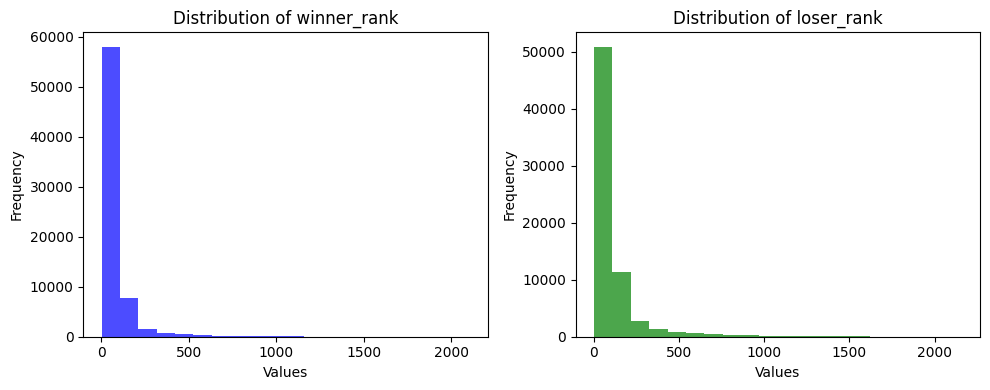

In [17]:
matches_with_rank = matches_df.loc[~matches_df['winner_rank'].isnull() & ~matches_df['loser_rank'].isnull()]

# Plot 2 histograms for distribution of values for "rank"
# Create subplots for the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram for winner_rank
ax1.hist(matches_with_rank['winner_rank'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of winner_rank')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')

# Plot the second histogram for loser_rank
ax2.hist(matches_with_rank['loser_rank'], bins=20, color='green', alpha=0.7)
ax2.set_title('Distribution of loser_rank')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

The histogram shows that most matches are won by players ranked in the top 100 (~60'000), which makes sense. Also, there are no outlier values like rank=5'000.

In [18]:
# could matches with empty minutes be due to the tourney_level?
# print(matches_empty_minutes['tourney_level'].value_counts())

#### Tournament start dates
It would be interesting to see on which weekdays tournaments start. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [19]:
# convert date from tourney_date 
matches_tournament_starts = matches_df.copy()
matches_tournament_starts['tourney_date_dt'] = pd.to_datetime(matches_df['tourney_date'], format='%Y%m%d')

# create a column representing the day of the week
matches_tournament_starts['tourney_date_dt_day_name'] = matches_tournament_starts['tourney_date_dt'].dt.day_name()

# day of week frequency for matches and rankingsday of week frequency for matches and rankings
matches_tournament_starts['tourney_date_dt_day_name'].value_counts(normalize=True)

tourney_date_dt_day_name
Monday      0.809
Friday      0.088
Sunday      0.074
Thursday    0.013
Wednesday   0.011
Saturday    0.004
Tuesday     0.001
Name: proportion, dtype: float64

As seen above, ca. **81%** of the matches started on a Monday. This is a strong case to say that for simplicity, we set all matches to start at the beginning of the week which would be Monday. But before doing this, let's see which matches don't start on a Monday and group by tournament type, then display the results using a bar chart.

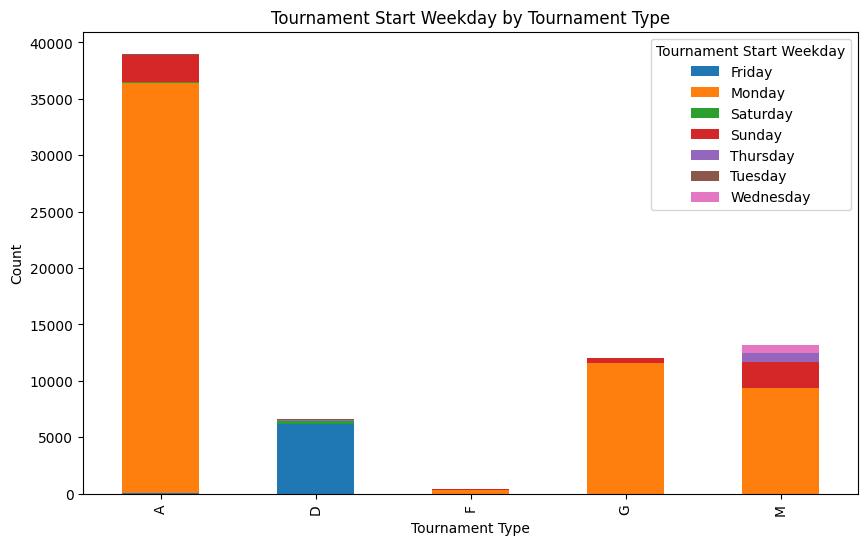

In [20]:
# Group the matches_tournament_starts by 'tourney_level' and 'tourney_date_dt_day_name' and count the occurrences
matches_tournament_starts = matches_tournament_starts.groupby(['tourney_level', 'tourney_date_dt_day_name']).size().unstack().fillna(0)

# Create a stacked bar chart
matches_tournament_starts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Tournament Start Weekday by Tournament Type')

# Display the legend
plt.legend(title='Tournament Start Weekday', loc='upper right')

# Show the plot
plt.show()

From [matches_data_dictionary.txt](data/matches_data_dictionary.txt):
- 'G' = Grand Slams
- 'M' = Masters 1000s
- 'A' = other tour-level events
- 'C' = Challengers
- 'S' = Satellites/ITFs
- 'F' = Tour finals and other season-ending events
- 'D' = Davis Cup 

Most tournaments start on a Monday, with a notable exception: Davis Cup, which are run over weekends and start on a Friday. 
**Decision**: For better linking with rankings, we've decided that we will set all tournaments' start dates to the Monday which precedes it. For example, if its Friday yyyy-mm-dd, then a supplemental date feature will be provided for its preceding Monday yyyy-mm-dd.

### Prediction benchmark for matches
In order to evaluate the prediction accuracy of our model, we need a benchmark to compare when predicting the results of matches. One simple benchmark would be to assume that the higher (i.e. closer to 1) ranked player will always win. This "higher-ranked player win ratio" can easily be calculated using the features available in the original dataset.
We know that some rankings are empty, so we will just substitute a number higher than the max. ranking (which is 2101).

In [21]:
# setting a prediction benchmark, empty ranking means no ranking, so replace with a arbitrary high value
matches_wins_by_ranking_df = matches_df.copy()
matches_wins_by_ranking_df[['winner_rank','loser_rank']] = matches_wins_by_ranking_df[['winner_rank','loser_rank']].fillna(value=10000)

# add a new feature which is the result of checking whether the winner was ranked higher (i.e. closer to 1) than the loser
matches_wins_by_ranking_df['winning_player_ranked'] = matches_wins_by_ranking_df.apply(lambda x: "higher" if x['winner_rank'] < x['loser_rank'] else "lower", axis=1)
matches_wins_by_ranking_df['winning_player_ranked'].value_counts(normalize=True)*100

winning_player_ranked
higher   65.638
lower    34.362
Name: proportion, dtype: float64

So we see that for our dataset, the higher ranked player won **66%** of all the matches. This will be our benchmark for evaluating the model.

### Load rankings
Data is also available in the form of ranking of ATP players. It may be required to supplement the missing data for current rankings in the matches dataset, for example, a player doesn't have a ranking at the time of playing a match. 

### Exploring the rankings data

In [22]:
# create a list of rankings (since the year 2000 ) files to load
atp_rankings_files = [f'{dirname}/atp_rankings_{year}.csv' for year in ['00s','10s', '20s', 'current']]

In [23]:
# create an empty dataframe to store all rankings
rankings_df = pd.DataFrame()

# loop through the list of rankings files, read them and append the data to the combined DataFrame
for filen in atp_rankings_files:
    rankings_df = pd.concat([rankings_df, pd.read_csv(filen, index_col=None)])


In [24]:
# explore the rankings data
rankings_df.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.000
1,20000110,2,102338,2915.000
2,20000110,3,101948,2419.000
3,20000110,4,103017,2184.000
4,20000110,5,102856,2169.000


In [25]:
# get an overview of number of features, instances, empty values and data types 
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140631 entries, 0 to 58510
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ranking_date  int64  
 1   rank          int64  
 2   player        int64  
 3   points        float64
dtypes: float64(1), int64(3)
memory usage: 81.7 MB


In [26]:
# sanity checks on the data (min values, max values, etc.)
rankings_df.describe()

,ranking_date,rank,player,points
count,2140631.000,2140631.000,2140631.000,2139882.000
mean,20112972.331,941.096,119768.989,117.056
std,66763.213,547.581,31216.724,455.880
min,20000110.000,1.000,100149.000,1.000
25%,20060213.000,470.000,104128.000,2.000
50%,20110919.000,946.000,105498.000,10.000
75%,20170306.000,1381.000,120568.000,65.000
max,20230911.000,2271.000,212464.000,16950.000


From the above table, the min and max values for the rankings make sense. Also, the ranking_date makes sense.

#### Ranking dates
Similar to which weekdays tournaments start, let's look at the days on which the rankings get updated. Becuase later, we want to link the rankings data with the matches data, so a common day of the week  would be required.

In [27]:
# convert date from ranking_date 
rankings_df['ranking_date_dt'] = pd.to_datetime(rankings_df['ranking_date'], format='%Y%m%d')

# create a column representing the day of the week
rankings_df['ranking_date_dt_day_name'] = rankings_df['ranking_date_dt'].dt.day_name()

# day of week frequency for ranking
rankings_df['ranking_date_dt_day_name'].value_counts(normalize=True)

ranking_date_dt_day_name
Monday   1.000
Name: proportion, dtype: float64

**All (100%)** of the rankings are updated on a Monday. Therefore, we are aligned with the idea to set all tournament start dates to a Monday.

## Data processing and cleaning

### Scope of processing and cleaning
x. Clean the date features and make them consistent
1. Replace the matches' winner and loser columns
2. Matches with 0 or less minutes - do we actually need minutes e.g. for a feature like "match_fatigue"?
3. Players without rankings: 
- if they played equal to or more than 50 matches (they had a long layoff due to injury, etc.) - keep match and lookup ranking from earlier. Apply penalty of 5 ranking places for each month they were absent.
- if the played less than 50 matches - remove match


### Execute the processing and cleaning

#### Start with a copy of the original loaded dataframes

In [35]:
matches_processed_df = matches_df.copy()
rankings_processed_df = rankings_df.copy()

#### Clean and consistent date features

#### Replace the matches' winner and loser columns
Uses the helper function defined earlier

In [36]:
# replace the winner and loser columns with player_1 and player_2 for the matches dataset
matches_processed_df= hide_winner_loser(matches_processed_df)
matches_processed_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,108.000,Jeff Tarango,Tommy Haas,101543,103163,NaN,1.000,NaN,NaN,L,R,180.000,188.000,USA,GER,31.100,21.700,63.000,11.000,595.000,1612.000,player_2
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,85.000,Franco Squillari,Juan Balcells,102644,102607,NaN,NaN,NaN,Q,L,R,183.000,190.000,ARG,ESP,24.300,24.500,49.000,211.000,723.000,157.000,player_2
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,56.000,Alberto Berasategui,Alberto Martin,102238,103252,NaN,NaN,NaN,NaN,R,R,173.000,175.000,ESP,ESP,26.500,21.300,59.000,48.000,649.000,726.000,player_2
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,68.000,Juan Carlos Ferrero,Roger Federer,103507,103819,7.000,NaN,NaN,NaN,R,R,183.000,185.000,ESP,SUI,19.900,18.400,45.000,61.000,768.000,616.000,player_1
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,115.000,Michael Sell,Nicolas Escude,102103,102765,NaN,4.000,Q,NaN,R,R,180.000,185.000,USA,FRA,27.300,23.700,167.000,34.000,219.000,873.000,player_1


#### Remove matches with 0 minutes

In [37]:
# remove matches with 0 or less minutes
# matches_df = matches_df.loc[matches_df['minutes']<0]


#### Add column that all tournaments start on a Monday

In [38]:
# add column for tournaments not starting on a Monday, with its value being the preceding Monday
matches_processed_df['tourney_date_dt'] = pd.to_datetime(matches_processed_df['tourney_date'], format='%Y%m%d')
matches_processed_df['tourney_date_dt_preceding_monday'] = matches_processed_df['tourney_date_dt'].apply(lambda x: x - pd.DateOffset(days=x.weekday()) if x.weekday() != 0 else x)

# verify that this columns date values are all on a Monday
matches_processed_df['tourney_date_dt_preceding_monday'].dt.day_name().value_counts()

tourney_date_dt_preceding_monday
Monday    71213
Name: count, dtype: int64

In [39]:
# check examples of these new column values compared to its original
matches_processed_df[matches_processed_df['tourney_date_dt'].dt.day_name() != 'Monday'][['tourney_date_dt', 'tourney_date_dt_preceding_monday']].groupby(['tourney_date_dt', 'tourney_date_dt_preceding_monday']).size().reset_index(name='count').head(3)

,tourney_date_dt,tourney_date_dt_preceding_monday,count
0,2000-01-28,2000-01-24,6
1,2000-02-04,2000-01-31,88
2,2000-03-17,2000-03-13,4


- 28 Jan. 2000 was a Friday, and 24 Jan. 2000 was the preceding Monday
- 4 Feb. 2000 was a Friday, and 31 Jan. 2000 was the preceding Monday
- 17 Mar. 2000 was a Friday, and 13 Mar. 2000 was the preceding Monday

#### Process matches with players having no ranking
As explained before, there are matches with players having no (empty) rank possibly because they have been inactive due to injury and hence lost their ranking before returning. If they are not new players, we can try and look up their last valid ranking in the rankings file. A recent example is Kevin Anderson, who was inactive for a period due to retiring in May 2022 and then announcing his comeback in July 2023* 

*Source: [Wikipedia "Kevin_Anderson (tennis)", accessed Oct. 2023](https://en.wikipedia.org/wiki/Kevin_Anderson_(tennis))

In [40]:
# later: define a function to look up historic rankings for players having no ranking in a particular match

In [57]:
# example of player previously having a ranking but later no ranking
matches_processed_df[((matches_processed_df['player_1_name'] == 'Kevin Anderson') & (matches_processed_df['player_1_rank'].isnull()))  
                    | 
                    ((matches_processed_df['player_2_name'] == 'Kevin Anderson') & (matches_processed_df['player_2_rank'].isnull()))
                    | 
                    ((matches_processed_df['player_1_name'] == 'Kevin Anderson') & (matches_processed_df['tourney_date'] < 20230701))
                    ].tail(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,player_1_name,player_2_name,player_1_id,player_2_id,player_1_seed,player_2_seed,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_ioc,player_2_ioc,player_1_age,player_2_age,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,winner,tourney_date_dt,tourney_date_dt_preceding_monday
451,2022-0424,Dallas,Hard,32,A,20220207,275,6-4 6-4,3,R32,61.000,Kevin Anderson,Sam Querrey,104731,105023,NaN,NaN,NaN,NaN,R,R,203.000,198.000,RSA,USA,35.700,34.300,101.000,118.000,699.000,605.000,player_1,2022-02-07,2022-02-07
474,2022-0499,Delray Beach,Hard,32,A,20220214,279,6-2 6-7(5) 6-2,3,R32,121.000,Kevin Anderson,Steve Johnson,104731,105449,NaN,NaN,NaN,NaN,R,R,203.000,188.000,RSA,USA,35.700,32.100,93.000,99.000,719.000,699.000,player_2,2022-02-14,2022-02-14
1781,2023-0315,Newport,Grass,32,A,20230717,295,6-2 6-4,3,QF,94.000,Kevin Anderson,Ugo Humbert,104731,200005,NaN,3.000,WC,NaN,R,L,203.000,188.000,RSA,FRA,37.100,25.000,NaN,40.000,NaN,1036.000,player_2,2023-07-17,2023-07-17
1787,2023-0315,Newport,Grass,32,A,20230717,289,6-3 7-6(6),3,R16,105.000,Gijs Brouwer,Kevin Anderson,133835,104731,NaN,NaN,NaN,WC,L,R,NaN,203.000,NED,RSA,27.300,37.100,145.000,NaN,418.000,NaN,player_2,2023-07-17,2023-07-17
1798,2023-0315,Newport,Grass,32,A,20230717,276,6-3 6-2,3,R32,89.000,Gabriel Diallo,Kevin Anderson,209113,104731,NaN,NaN,NaN,WC,R,R,NaN,203.000,CAN,RSA,21.800,37.100,141.000,NaN,443.000,NaN,player_2,2023-07-17,2023-07-17


### Observations
Some initial observations about the x data sets
1. ...
2. ...

## Final Conclusion  <a name="final-concl"></a>

...